<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/regressao_saude_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#getting the data files from my github repository
#!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
#!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-04-18 22:23:53--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.33M  --.-KB/s    in 0.07s   

2022-04-18 22:23:53 (20.0 MB/s) - ‘train.csv’ saved [1397869/1397869]

--2022-04-18 22:23:53--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text/pla

In [9]:
#https://arxiv.org/abs/2003.07445v1
# reading the training file
dfTrain = pd.read_csv('train.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [10]:
#descriptive statistics of variables
dfTrain.describe()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,0.020166,0.027513,0.051478,0.031895,21.691668,0.541286,0.653501,0.219475,0.010223,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,0.016394,0.019818,0.039049,0.057913,4.283338,0.101635,0.070514,0.089927,1.022667,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,-3.368797,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,0.010820,0.015620,0.027930,0.011063,19.407000,0.469290,0.597100,0.157740,-0.695530,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,0.016080,0.022960,0.041300,0.018663,21.915000,0.542300,0.645100,0.206200,0.012535,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,0.024000,0.032920,0.062070,0.031547,24.476000,0.614110,0.710790,0.264070,0.706236,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,4.051689,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [11]:
#getting a vector of independents variables named preditoras.
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X_treino = dfTrain[preditoras].values
y_treino = dfTrain['score'].values


In [12]:
#selecting variables by KBest method. 
#Selected as variables with the highest k score. (calculates the p-value of each and returns the smallest p-values)


# feature selection
def select_features(X_treino, y_treino):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_treino, y_treino)
  # transform treino input data
	X_treino_fs = fs.transform(X_treino)
	return X_treino_fs, fs


Feature 0: 0.077948
Feature 1: 0.123453
Feature 2: 0.072893
Feature 3: 0.085669
Feature 4: 0.071832
Feature 5: 0.109205
Feature 6: 0.099510
Feature 7: 0.088556
Feature 8: 0.111183
Feature 9: 0.101433
Feature 10: 0.088829
Feature 11: 0.075903
Feature 12: 0.104800
Feature 13: 0.085418
Feature 14: 0.214104
Feature 15: 0.097470
Feature 16: 0.000000
Feature 17: 0.004755
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.011908
Feature 21: 0.000009
Feature 22: 0.000000
Feature 23: 0.001986
Feature 24: 0.000000
Feature 25: 0.022524
Feature 26: 0.000000


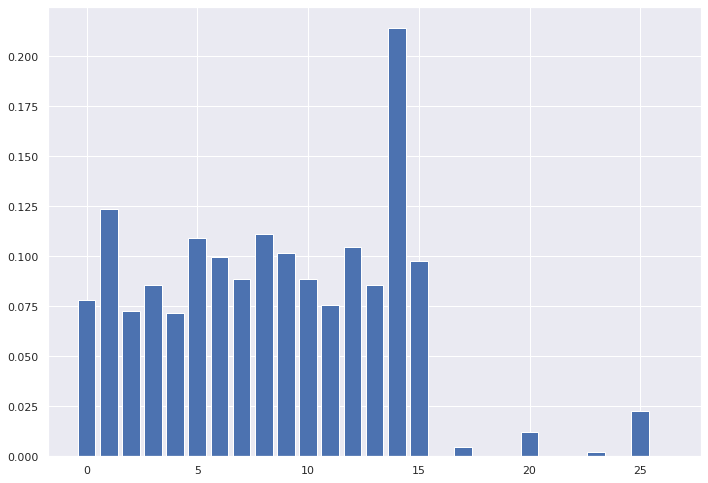

In [13]:
#call the function select_features
X_treino_fs, fs = select_features(X_treino, y_treino)

# what are scores for the features (list the score of each feature)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [14]:
#get the 15 most important variable
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes ]



In [15]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [16]:
#removing the outliers using quantile measure
dados = dfTrain.copy()
#for c in n_preditoras:
#  Q1 = dados[c].quantile(0.25)
#  Q3 = dados[c].quantile(0.75)
#  IQR = Q3 - Q1
#  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [17]:
#pearson and spearman correlation
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V21,V20,V3,V13,V16,V6,V10,V18,V9,V12,V15,V8,V11,V4,V17
V21,1.000000,0.016641,-0.007524,-0.003270,-0.019640,-0.000387,-0.003268,-0.025934,-0.006037,-0.011217,0.013264,-0.003704,-0.004042,-0.017084,-0.025544
V20,0.016641,1.000000,0.021759,0.033545,0.031224,0.021586,0.033543,0.016482,0.039578,0.048379,-0.037345,0.038662,0.041013,0.014409,-0.008854
V3,-0.007524,0.021759,1.000000,0.641014,0.411791,0.967857,0.641016,0.717456,0.694096,0.627016,-0.659002,0.687538,0.669591,0.858551,0.227024
V13,-0.003270,0.033545,0.641014,1.000000,0.441952,0.656800,1.000000,0.573661,0.968304,0.883415,-0.780644,0.979972,0.965612,0.612197,0.126530
V16,-0.019640,0.031224,0.411791,0.441952,1.000000,0.370937,0.441959,0.559053,0.474855,0.483116,-0.657909,0.472064,0.455925,0.547103,0.184049
V6,-0.000387,0.021586,0.967857,0.656800,0.370937,1.000000,0.656803,0.665270,0.713624,0.651312,-0.650665,0.712702,0.709534,0.788864,0.180539
V10,-0.003268,0.033543,0.641016,1.000000,0.441959,0.656803,1.000000,0.573664,0.968306,0.883416,-0.780645,0.979974,0.965613,0.612200,0.126529
V18,-0.025934,0.016482,0.717456,0.573661,0.559053,0.665270,0.573664,1.000000,0.631686,0.618943,-0.750613,0.612283,0.591211,0.790928,0.387267
V9,-0.006037,0.039578,0.694096,0.968304,0.474855,0.713624,0.968306,0.631686,1.000000,0.934977,-0.800786,0.992303,0.977410,0.646049,0.121575
V12,-0.011217,0.048379,0.627016,0.883415,0.483116,0.651312,0.883416,0.618943,0.934977,1.000000,-0.773861,0.933744,0.937911,0.577094,0.175666


,V21,V20,V3,V13,V16,V6,V10,V18,V9,V12,V15,V8,V11,V4,V17
V21,1.000000,0.019662,-0.011147,-0.014269,-0.014348,-0.009368,-0.014257,-0.019552,-0.013022,-0.014922,0.010573,-0.014074,-0.014957,-0.011374,-0.026232
V20,0.019662,1.000000,0.015259,0.049567,0.035644,0.013382,0.049567,0.022089,0.049055,0.051952,-0.042945,0.050391,0.051576,0.022611,-0.005964
V3,-0.011147,0.015259,1.000000,0.607746,0.519700,0.955943,0.607745,0.841318,0.663052,0.623547,-0.745171,0.641892,0.612350,0.899536,0.436419
V13,-0.014269,0.049567,0.607746,1.000000,0.431457,0.652189,1.000000,0.586486,0.964802,0.917000,-0.779047,0.983646,0.982150,0.579338,0.248633
V16,-0.014348,0.035644,0.519700,0.431457,1.000000,0.503719,0.431467,0.541264,0.470552,0.504522,-0.644821,0.479786,0.458281,0.629945,0.181063
V6,-0.009368,0.013382,0.955943,0.652189,0.503719,1.000000,0.652188,0.841950,0.691103,0.659397,-0.783978,0.678967,0.660515,0.883948,0.478518
V10,-0.014257,0.049567,0.607745,1.000000,0.431467,0.652188,1.000000,0.586490,0.964803,0.916999,-0.779045,0.983647,0.982149,0.579342,0.248644
V18,-0.019552,0.022089,0.841318,0.586486,0.541264,0.841950,0.586490,1.000000,0.652999,0.656096,-0.744737,0.635535,0.616122,0.798884,0.408790
V9,-0.013022,0.049055,0.663052,0.964802,0.470552,0.691103,0.964803,0.652999,1.000000,0.950717,-0.782699,0.986543,0.973268,0.630840,0.253086
V12,-0.014922,0.051952,0.623547,0.917000,0.504522,0.659397,0.916999,0.656096,0.950717,1.000000,-0.786602,0.963311,0.960027,0.629502,0.295967


In [18]:
#removing variables with high correlation (greater than 0.9)
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)
n_preditoras = [c for c in n_preditoras if not c in retirar]
n_preditoras

['V21',
 'V20',
 'V16',
 'V6',
 'V10',
 'V18',
 'V9',
 'V15',
 'V8',
 'V11',
 'V4',
 'V17']

In [19]:
#removing variables with high correlation (greater than 0.9)
dados_corr = dados[n_preditoras].corr('spearman')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.7]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)
n_preditoras = [c for c in n_preditoras if not c in retirar]
n_preditoras

['V21', 'V20', 'V16', 'V18', 'V9', 'V15', 'V8', 'V11', 'V4', 'V17']

In [20]:
def criaRuido_1(n_preditoras, x):
  k=2
  valor=0
  for i in range(len(n_preditoras)):
    valor+=(k+i)*x[n_preditoras[i]]
  return valor

def criaRuido_2(n_preditoras, x):
  k=2
  n1 = np.random.normal(0,1)
  n2 = np.random.normal(0,1)
  n3 = np.random.normal(0,1) 
  valor=0
  for i in range(len(n_preditoras)):
    valor+=(k+i)*x[n_preditoras[i]] + n1 + n2 + n3
  return valor

def criaRuido_3(n_preditoras, x):
  k=2
  valor=0
  for i in range(len(n_preditoras)):
    valor+=x[n_preditoras[i]]
  return valor


def calcula_bias(df, n_preditoras, tipo):
  if tipo==1:
    df['bias'] = df[n_preditoras].loc[:,:].apply(lambda x: criaRuido_1(n_preditoras, x) , axis=1)
  elif tipo==2:
    df['bias'] = df[n_preditoras].loc[:,:].apply(lambda x: criaRuido_2(n_preditoras, x) , axis=1)
  elif tipo==3:
     df['bias'] = df[n_preditoras].loc[:,:].apply(lambda x: criaRuido_3(n_preditoras, x) , axis=1)
  else:
    print('Tipo inexistente')
    df['bias']=None


  return df['bias']
  

In [21]:
dados['bias_2'] = calcula_bias(dados, n_preditoras, 2)
#dados['bias_3'] = calcula_bias(dados, n_preditoras, 3)
n_preditoras.append('bias_2')
#n_preditoras.append('bias_3')

In [22]:
#split train sample in two samples: X_treino and X_teste
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [23]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.fit_transform(X_teste)

Number of Estimators: 1 mse: 0.23369737937836763 rmse: 0.48342256813099616
Number of Estimators: 11 mse: 0.13780591935581854 rmse: 0.37122219674450846
Number of Estimators: 21 mse: 0.1294280031985697 rmse: 0.35976103624290623
Number of Estimators: 31 mse: 0.12781459422593253 rmse: 0.35751167005558365
Number of Estimators: 41 mse: 0.12634522541336943 rmse: 0.3554507355645356
Number of Estimators: 51 mse: 0.1247930025813765 rmse: 0.3532605307437791
Number of Estimators: 61 mse: 0.124641261390255 rmse: 0.3530456930628881
Number of Estimators: 71 mse: 0.1251081750096201 rmse: 0.353706340075521
Number of Estimators: 81 mse: 0.12528125329118878 rmse: 0.3539509193252488
Number of Estimators: 91 mse: 0.12422734745403209 rmse: 0.352459001096627
Melhor n: 91  com mse: 0.12422734745403209


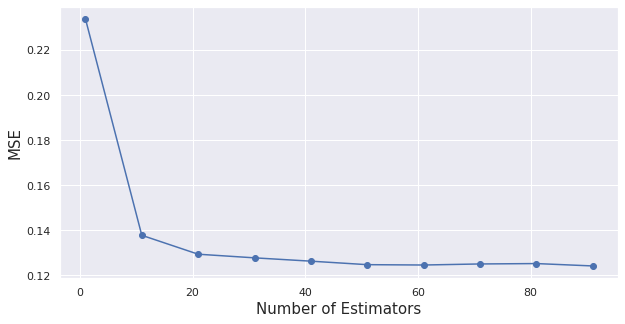

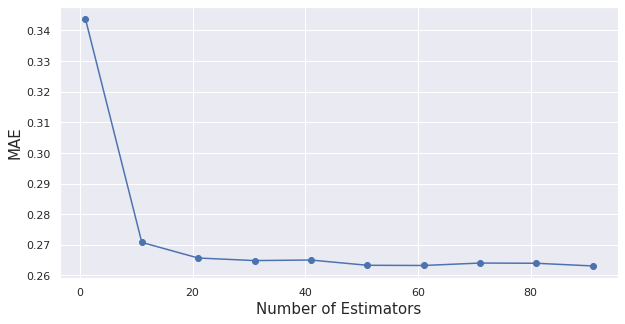

In [24]:
#simulating the best number of estimator for random forest
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n, random_state= 12)
    model.fit(X_treino,y_treino)
    y_pred = model.predict(X_teste) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [25]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelRf = RandomForestRegressor(n_estimators=best_n, random_state=12)
modelRf.fit(X_treino,y_treino)
y_pred = modelRf.predict(X_teste) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 


(0.352459001096627, 0.12422734745403209, 0.2630922523837688)

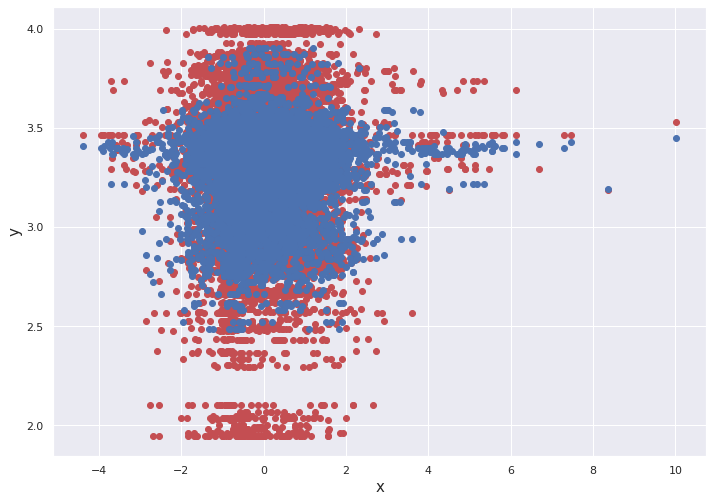

In [26]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

Number of Estimators: 1 mse: 0.26995191204886543 rmse: 0.5195689675575952
Number of Estimators: 11 mse: 0.1403754754168364 rmse: 0.37466715283947216
Number of Estimators: 21 mse: 0.13066988730629261 rmse: 0.3614829004341597
Number of Estimators: 31 mse: 0.128561325675525 rmse: 0.3585544947083009
Number of Estimators: 41 mse: 0.12644379125274446 rmse: 0.35558935762019717
Number of Estimators: 51 mse: 0.12590173221695428 rmse: 0.35482634092884685
Number of Estimators: 61 mse: 0.12589966686965665 rmse: 0.3548234305533622
Number of Estimators: 71 mse: 0.12571315418440215 rmse: 0.35456050849523857
Number of Estimators: 81 mse: 0.12485089834551018 rmse: 0.3533424660941707
Number of Estimators: 91 mse: 0.12459062279561495 rmse: 0.35297396900566896
Melhor n: 91  com mse: 0.12459062279561495


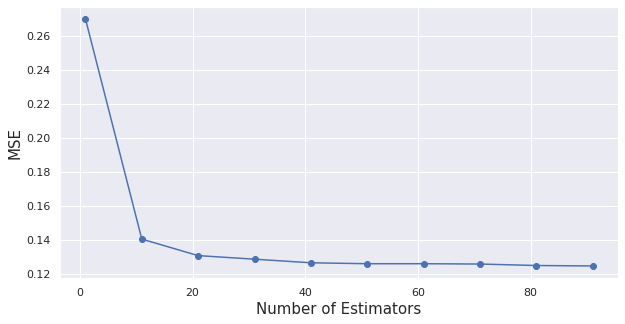

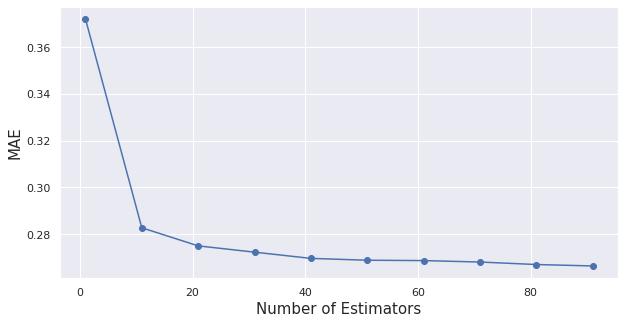

In [27]:
#simulating the best number of estimator for ExtraTreesRegressor
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = ExtraTreesRegressor(n_estimators=n, random_state= 123)
    model.fit(X_treino,y_treino)
    y_pred = model.predict(X_teste) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [28]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelETR = ExtraTreesRegressor(n_estimators=best_n, random_state=123, n_jobs = -1)
modelETR.fit(X_treino,y_treino)
y_pred = modelETR.predict(X_teste) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 

(0.35297396900566896, 0.12459062279561496, 0.26644753305781566)

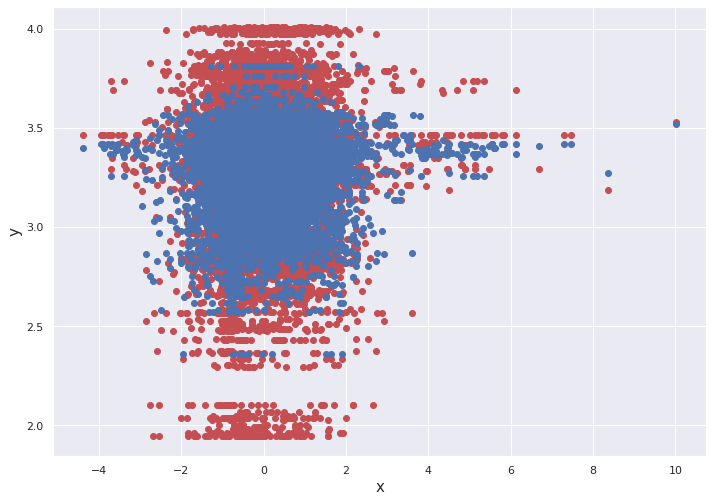

In [29]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [ ]:
#train a new model with all examples of training file
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+0.01))
modelEnd= ExtraTreesRegressor(n_estimators=best_n, random_state=123, n_jobs = -1)
modelEnd.fit(X,y)

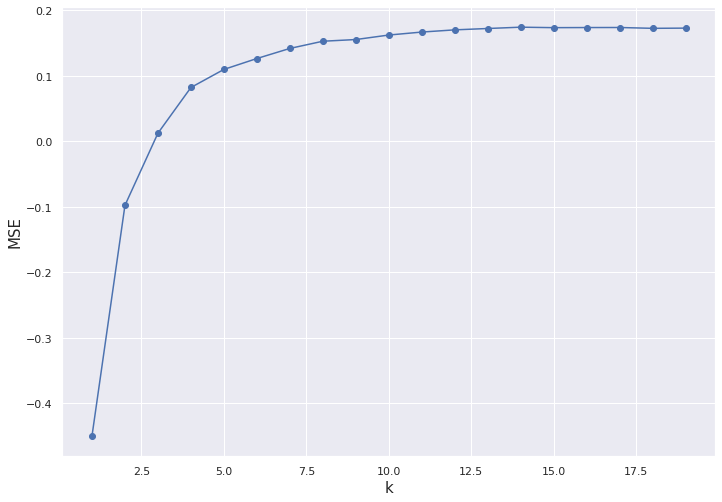

Melhor k: 14


In [48]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k, weights = 'distance', metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X_treino, y_treino, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [57]:
model = KNeighborsRegressor(n_neighbors=best_k,  metric = 'euclidean')
model.fit(X_treino, y_treino)
y_pred = model.predict(X_teste)
print('MSE:', mean_squared_error(y_pred, y_teste), 'RMSE:', mean_squared_error(y_pred, y_teste, squared=False) )

MSE: 0.14844043517297278 RMSE: 0.385279684350178


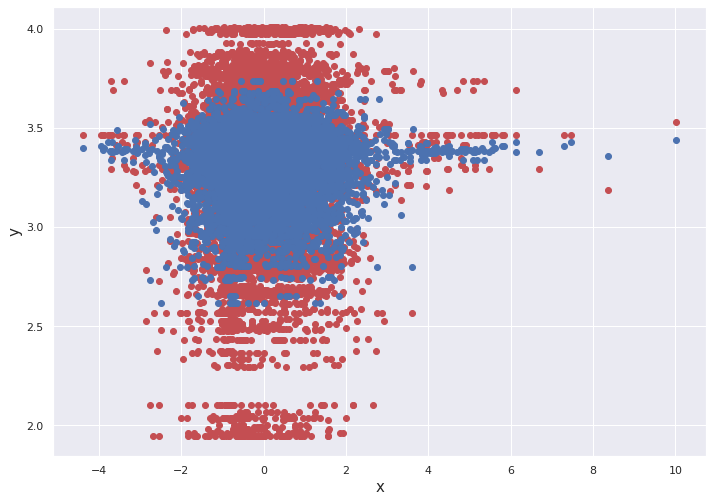

In [52]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [82]:
from pandas.core.common import random_state
from sklearn.svm import SVR
model = SVR(C=0.9)
model.fit(X_treino, y_treino)
y_pred = model.predict(X_teste)
print('MSE:', mean_squared_error(y_pred, y_teste), 'RMSE:', mean_squared_error(y_pred, y_teste, squared=False) )

MSE: 0.13501542481476372 RMSE: 0.3674444513321214


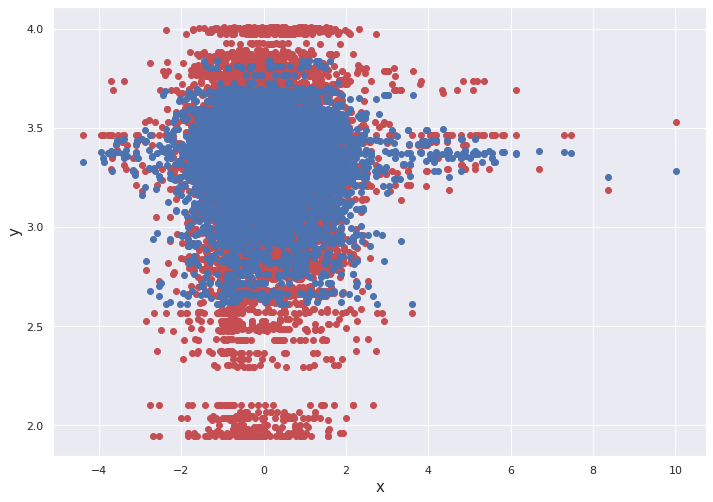

In [83]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [ ]:
##transform test sample and predict with the best model
#the best model is modelETR because it got the lowest RMSE.
dfTest = pd.read_csv('test.csv')
n_preditoras.remove('bias_2')
#n_preditoras.remove('bias_3')
dfTest['bias_2'] = calcula_bias(dfTest, n_preditoras, 2)
#dfTest['bias_3'] = calcula_bias(dfTest, n_preditoras, 3)
n_preditoras.append('bias_2')
#n_preditoras.append('bias_3')
X_teste = dfTest[n_preditoras]
y_pred = modelEnd.predict(X_teste) 

In [ ]:
#create a new dataframe with predicted values. Then, export it to a csv.
dfRes = pd.DataFrame()
dfRes['Id'] = dfTest['Id']
dfRes['Expected'] = np.exp(y_pred-0.01)
dfRes.to_csv('hed_result.csv', index=False)

In [ ]:
#list the first lines of file.
!head hed_result.csv 